In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [2]:
# Summary statistics for all columns
summary_stats = df.describe(include='all').transpose()
print(summary_stats)

             count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842

In [3]:
medians = df.median(numeric_only=True)
stds = df.std(numeric_only=True)
print(medians)
print(stds)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_numeric = df.select_dtypes(include=[np.number])

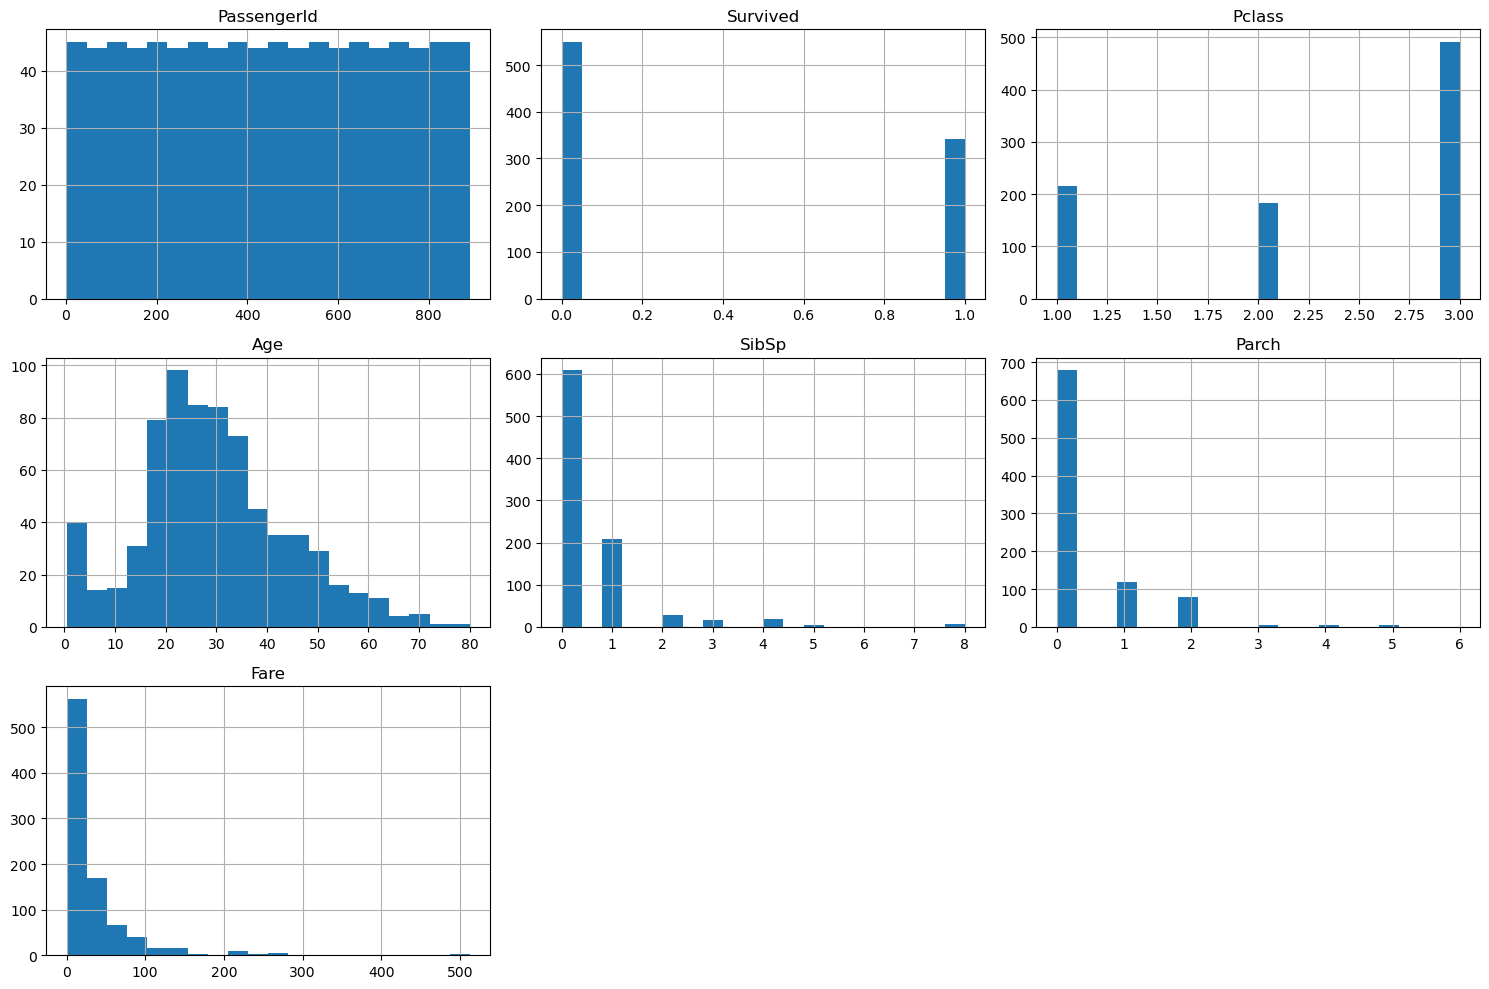

In [6]:
df_numeric.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

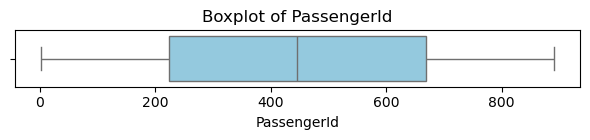

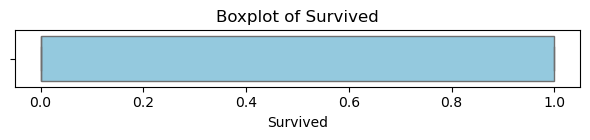

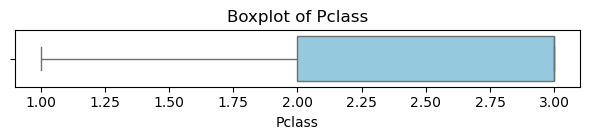

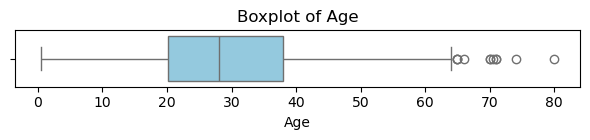

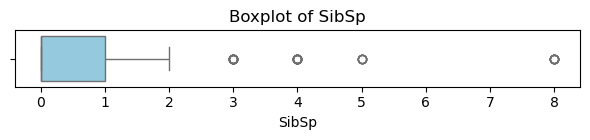

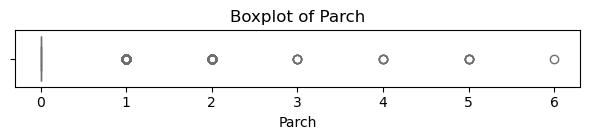

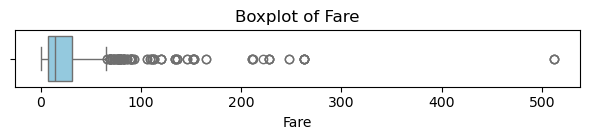

In [7]:
# Boxplots for each numeric feature
for col in df_numeric.columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_numeric[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

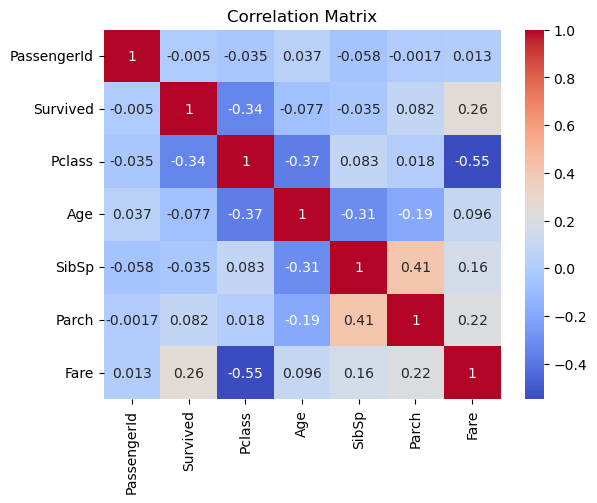

In [8]:

import seaborn as sns

# Correlation matrix heatmap
import matplotlib.pyplot as plt
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Distribution of Survived
print(df['Survived'].value_counts(normalize=True))

# Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())

# Age-based survival trend (grouped by bins)
age_bins = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
print(df.groupby(age_bins)['Survived'].mean())

# Outliers in Age
print(df[(df['Age'] < 0) | (df['Age'] > 80)])

# Missing values
print(df.isnull().sum())


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\Manju\AppData\Local\Temp\ipykernel_12804\3576677230.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(age_bins)['Survived'].mean())
